# Figure 6a

This notebook loads the data and produces figure 6a. The intermediate file "figure6_nbdadvantage_significance_bystate.csv" is calculated in the Analysis folder and reloaded here to be used for the figure. You can reproduce the figure by downloading the file from our data repository. 

In [1]:
savedate = '20251031'

In [2]:
geodata_folder = '' # save the shape file folders here
figure_data_folder = '' # save the data from the data repository here in a subfolder called "FigureData"

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import geopandas as geopd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
import us
state_list = [state.abbr for state in us.states.STATES]
import state_name_crs_mappings_ML as crsm
from matplotlib.patches import Patch

# Read and prepare data

In [4]:
state_categories_all = pd.read_csv(figure_data_folder + 'FigureData/figure6_nbdadvantage_significance_bystate.csv', index_col=0)

In [5]:
gdf_state = geopd.read_file(geodata_folder + 'cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
crs = int(crsm.state_to_crs(crsm.abbrev_to_state('MS')).split(':')[1])
gdf_state = gdf_state.to_crs(epsg=crs)
gdf_state = gdf_state.loc[~(gdf_state['NAME'].isin(['United States Virgin Islands', 'Guam', 'Commonwealth of the Northern Mariana Islands', 'American Samoa', 'Puerto Rico']))]

In [6]:
hatches_mapping = {'POS':'x', 'NEG':'o', 'INSIG':''}
cmap = matplotlib.colormaps['Blues']
colors = cmap(np.linspace(0, 1, 20))
colour_mapping = {'POS':matplotlib.colors.rgb2hex(colors[18]),
                  'POS-POS':'#FDE725FF',
                  'INSIG-POS':'#33638DFF',
                  'POS-INSIG':'#20A387FF',
                  'NEG':matplotlib.colors.rgb2hex(colors[8]),
                  'NEG-NEG':'#481567ff',
                  'NEG-INSIG':'#55c667ff', 'INSIG-NEG':'#dce319ff', 
                  'INSIG':'#cccccc', 'INSIG-INSIG':'#cccccc', 
                  'NEG-POS':'#33638DFF', 'POS-NEG':'#73d055ff'}

gdf_copy = gdf_state.copy()
for i in gdf_copy.index:
    state = gdf_copy.loc[i, 'STUSPS']
    for col in ['localBG_10km', 'neighBG_10km', 'localBG_only']:
        gdf_copy.loc[i, col] = state_categories_all.loc[col, state]
        gdf_copy.loc[i, col+'_colour']= colour_mapping[gdf_copy.loc[i, col]]
        if gdf_copy.loc[i, col] in hatches_mapping.keys():
            gdf_copy.loc[i, col+'_hatch'] = hatches_mapping[gdf_copy.loc[i, col]]
            
gdf_hi = gdf_copy[gdf_copy['STUSPS']=='HI'].copy()
gdf_ak = gdf_copy[gdf_copy['STUSPS']=='AK'].copy()
gdf_rest = gdf_copy[~(gdf_copy['STUSPS'].isin(['HI', 'AK']))].copy()
gdf_ak.to_crs({'init':'epsg:5936'}, inplace=True)
gdf_hi.to_crs({'init':'epsg:3759'}, inplace=True)

/Users/spowell/Library/Python/3.10/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Plot

In [10]:
def stars(pval):
    if pval < 0.05:
        if pval < 0.01:
            if pval < 0.001:
                return "***"
            else:
                return "**"
        else:
            return '*'
    else:
        return ''

/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_37588/112278488.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


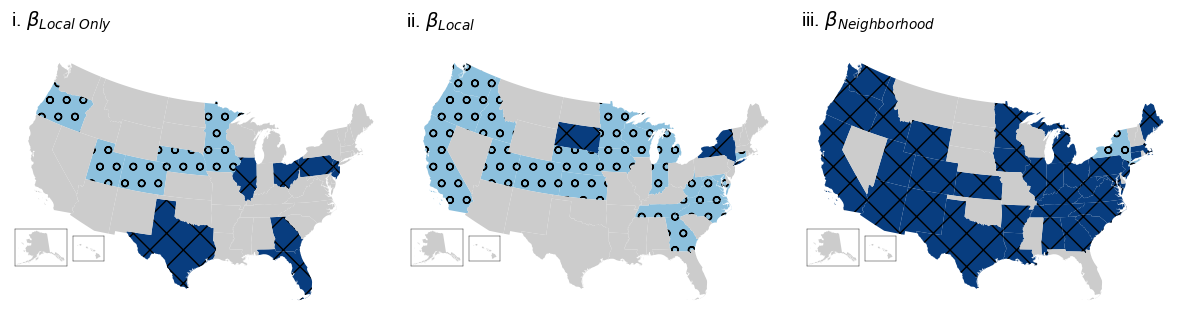

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

for i, col in enumerate(['localBG_only', 'localBG_10km', 'neighBG_10km']):
    for val in ['POS', 'NEG', 'INSIG']:
        inds = gdf_rest[gdf_rest[col]==val].index
        gdf_rest.loc[inds, :].plot(categorical=True, legend=True, ax=axes[i], color=gdf_rest.loc[inds, col+'_colour'], hatch=hatches_mapping[val])
        
col = 'localBG_only'

akax = fig.add_axes([0., 0.33, 0.15/2, 0.15/2])
akax.set_xlim([0.5e6, 3.5e6])
akax.set_xticks([])
akax.set_yticks([])
for axis in ['top','bottom','left','right']:
    akax.spines[axis].set_linewidth(0.3)
    
hiax = fig.add_axes([0.052, 0.34, 0.1/2, 0.1/2])
hiax.set_xlim([0.5e6, 3e6])
hiax.set_ylim([-1e6, 1e6])
hiax.set_xticks([])
hiax.set_yticks([])
for axis in ['top','bottom','left','right']:
    hiax.spines[axis].set_linewidth(0.3)
    

for val in ['POS', 'NEG', 'INSIG']:
    inds = gdf_ak[gdf_ak[col]==val].index
    if len(inds) > 0:
        gdf_ak.loc[inds, :].plot(categorical=True, legend=False, 
                                 ax=akax,
                                 color=gdf_ak.loc[inds, col+'_colour'], hatch=hatches_mapping[val])
    inds2 = gdf_hi[gdf_hi[col]==val].index
    if len(inds2) > 0:
        gdf_hi.loc[inds2, :].plot(categorical=True, legend=False,
                                  ax=hiax,
                                  color=gdf_hi.loc[inds2, col+'_colour'], hatch=hatches_mapping[val])
        
        
col = 'localBG_10km'

akax = fig.add_axes([0.33, 0.33, 0.15/2, 0.15/2])
akax.set_xlim([0.5e6, 3.5e6])
akax.set_xticks([])
akax.set_yticks([])
for axis in ['top','bottom','left','right']:
    akax.spines[axis].set_linewidth(0.3)
    
hiax = fig.add_axes([0.382, 0.34, 0.1/2, 0.1/2])
hiax.set_xlim([0.5e6, 3e6])
hiax.set_ylim([-1e6, 1e6])
hiax.set_xticks([])
hiax.set_yticks([])
for axis in ['top','bottom','left','right']:
    hiax.spines[axis].set_linewidth(0.3)
    

for val in ['POS', 'NEG', 'INSIG']:
    inds = gdf_ak[gdf_ak[col]==val].index
    if len(inds) > 0:
        gdf_ak.loc[inds, :].plot(categorical=True, legend=False, 
                                 ax=akax,
                                 color=gdf_ak.loc[inds, col+'_colour'], hatch=hatches_mapping[val])
    inds2 = gdf_hi[gdf_hi[col]==val].index
    if len(inds2) > 0:
        gdf_hi.loc[inds2, :].plot(categorical=True, legend=False,
                                  ax=hiax,
                                  color=gdf_hi.loc[inds2, col+'_colour'], hatch=hatches_mapping[val])
        
            
col = 'neighBG_10km'

akax = fig.add_axes([0.66, 0.33, 0.15/2, 0.15/2])
akax.set_xlim([0.5e6, 3.5e6])
akax.set_xticks([])
akax.set_yticks([])
for axis in ['top','bottom','left','right']:
    akax.spines[axis].set_linewidth(0.3)
    
hiax = fig.add_axes([0.382+.33, 0.34, 0.1/2, 0.1/2])
hiax.set_xlim([0.5e6, 3e6])
hiax.set_ylim([-1e6, 1e6])
hiax.set_xticks([])
hiax.set_yticks([])
for axis in ['top','bottom','left','right']:
    hiax.spines[axis].set_linewidth(0.3)
    

for val in ['POS', 'NEG', 'INSIG']:
    inds = gdf_ak[gdf_ak[col]==val].index
    if len(inds) > 0:
        gdf_ak.loc[inds, :].plot(categorical=True, legend=False, 
                                 ax=akax,
                                 color=gdf_ak.loc[inds, col+'_colour'], hatch=hatches_mapping[val])
    inds2 = gdf_hi[gdf_hi[col]==val].index
    if len(inds2) > 0:
        gdf_hi.loc[inds2, :].plot(categorical=True, legend=False,
                                  ax=hiax,
                                  color=gdf_hi.loc[inds2, col+'_colour'], hatch=hatches_mapping[val])


axes[0].set_title('i. $\\beta_{Local~Only}$', loc='left', fontsize=14)
axes[1].set_title('ii. $\\beta_{Local}$', loc='left', fontsize=14)
axes[2].set_title('iii. $\\beta_{Neighborhood}$', loc='left', fontsize=14)

for i in range(3):
    axes[i].axis('off')
    
plt.tight_layout()
plt.savefig('Figures/figure6a_state_advantage_three_nolegends_'+savedate+'.pdf', bbox_inches='tight')
plt.savefig('Figures/figure6a_state_advantage_three_nolegends_'+savedate+'.png', bbox_inches='tight', dpi=400)
plt.show()



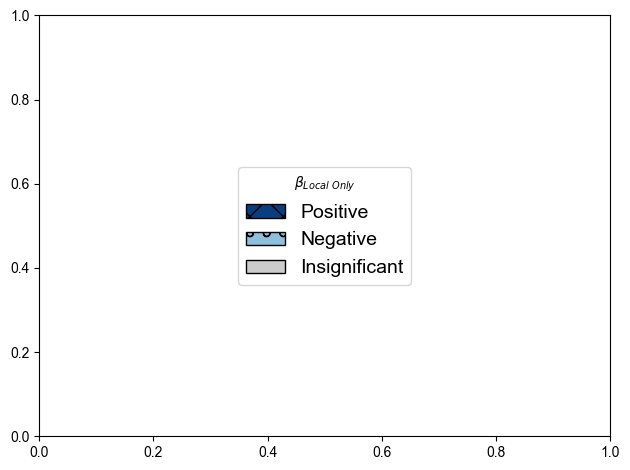

In [12]:
fig, axes = plt.subplots(1, 1)
label_renaming={'POS':'Positive', 'NEG':'Negative', 'INSIG':'Insignificant'}

legend_elements1 = [Patch(facecolor=colour_mapping[key], label=label_renaming[key], edgecolor='k', hatch=hatches_mapping[key]) for key in ['POS', 'NEG', 'INSIG'] if key in gdf_copy['localBG_only'].unique()]
axes.legend(handles=legend_elements1, loc='center', title='$\\beta_{Local~Only}$', fontsize=14)
plt.tight_layout()
plt.savefig('Figures/figure6a_map_legend.pdf', bbox_inches='tight')
plt.show()
